Overall Accuracy: 0.9385964912280702
Confusion Matrix:
[[67  4]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



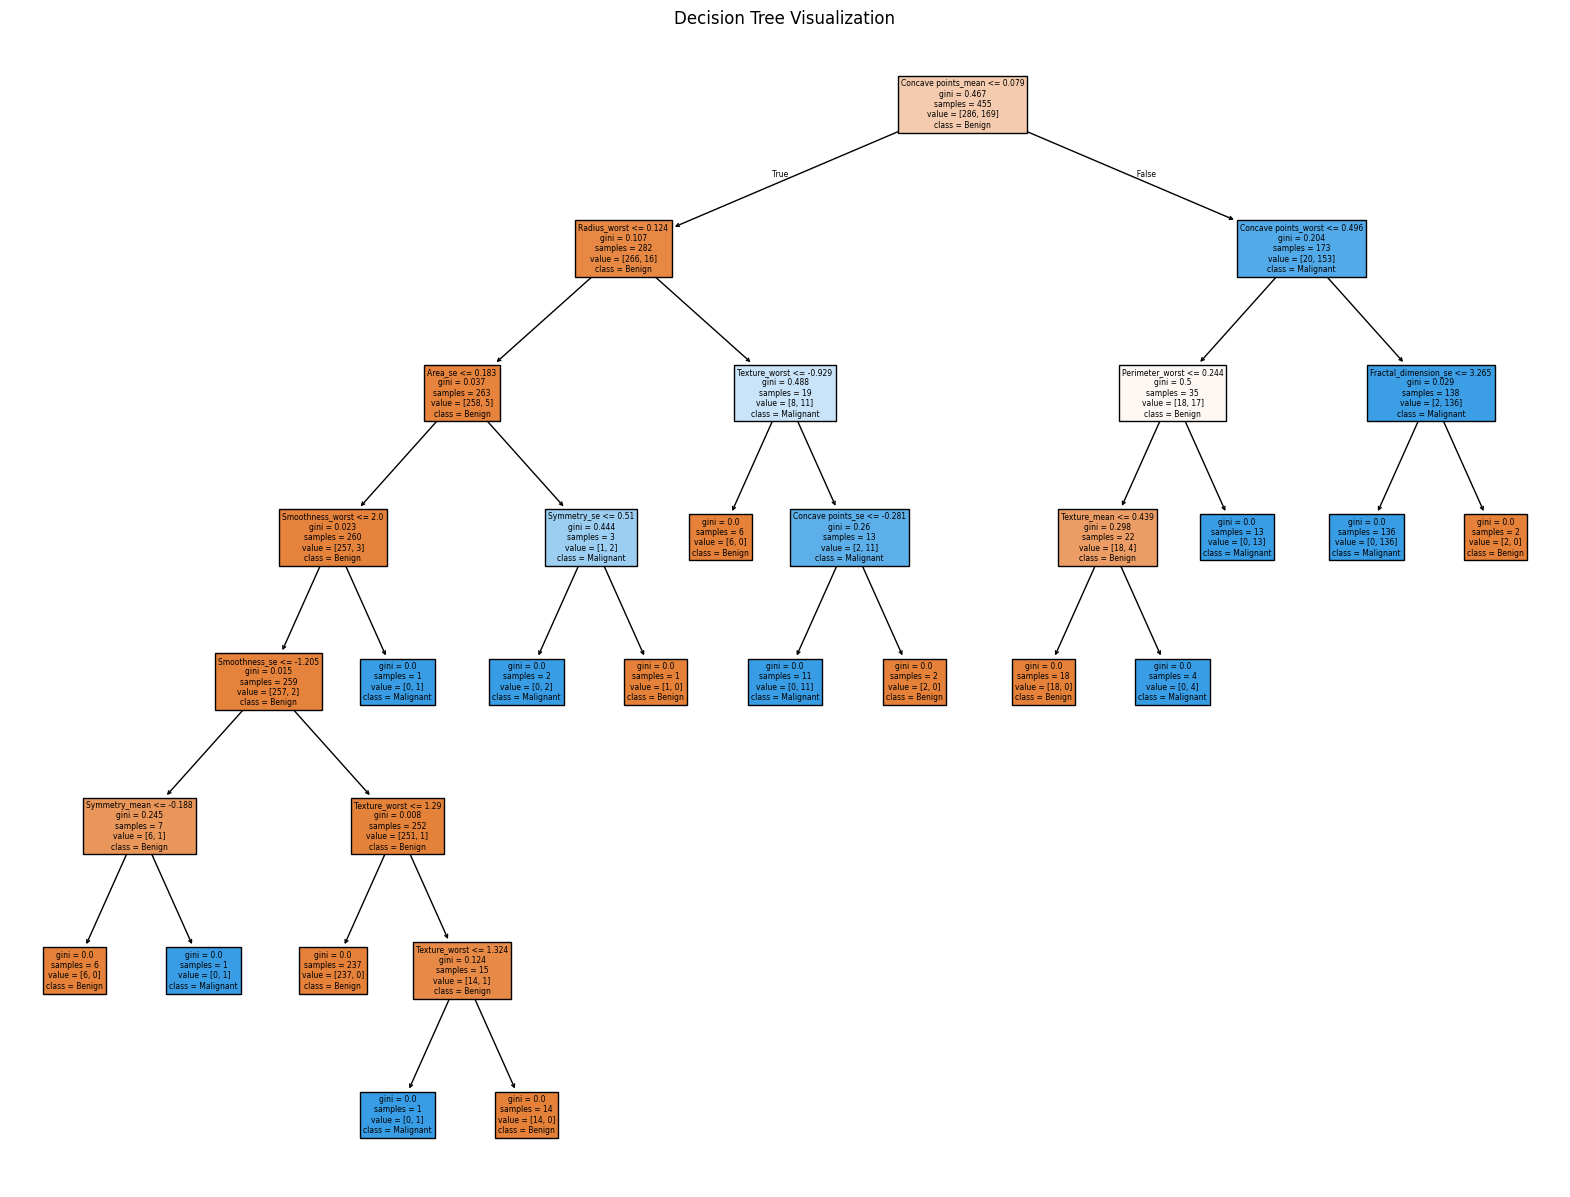

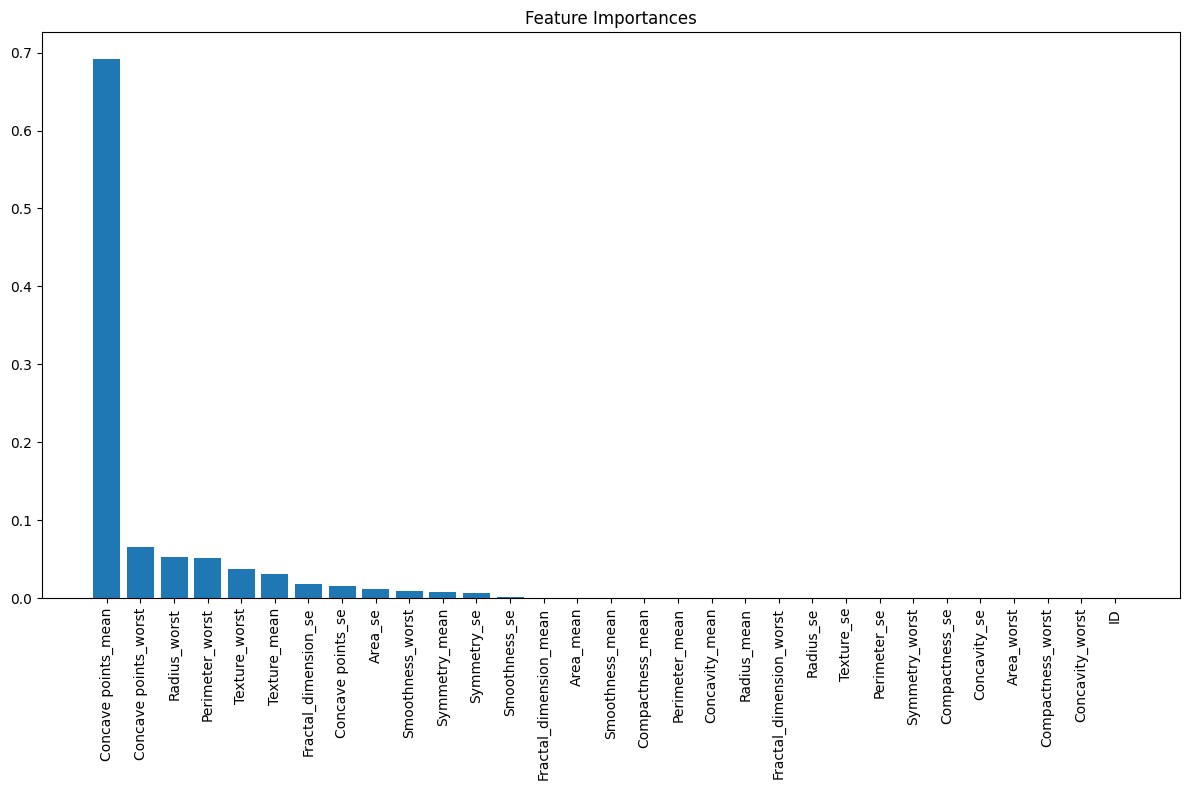

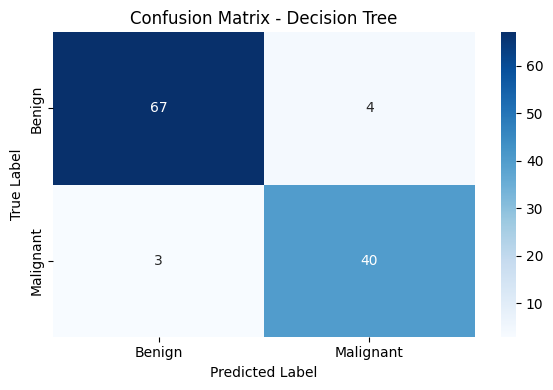


Interpretation of the Confusion Matrix:
This helps us understand how well the model predicted whether tumors were cancerous or not.

ACTUAL diagnosis vs what the model PREDICTED:

Tumors that were ACTUALLY benign (non-cancerous):
   ✅ 67 were Correctly predicted as benign
   ❌ 4 were Wrongly predicted as malignant

Tumors that were ACTUALLY malignant (cancerous):
   ❌ 3 were Wrongly predicted as benign
   ✅ 40 were Correctly predicted as malignant


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import ssl
import seaborn as sns
#to avoid SSL certificate verification errors  
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    #legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    #handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
    
#load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = [
    'ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
    'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se',
    'Concave points_se', 'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst',
    'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 'Concave points_worst',
    'Symmetry_worst', 'Fractal_dimension_worst'
]
data = pd.read_csv(url, header=None, names=column_names)

#target variable Diagnosis to binary (M = malignant, B = benign)
#M = Malignant (cancerous) → 1
#B = Benign (non-cancerous) → 0
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})


X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#making predictions
#this predicts either a (malignant = 1) or (benign = 0) tumor
#and evaluates the model using accuracy confusion matrix and classification report
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#confusion matrix values
tn, fp, fn, tp = conf_matrix.ravel() #used for confusion prediction correction table 
#true negative, false positive, false negative, true positive


print(f'Overall Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

#plot
plt.figure(figsize=(20,15))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'])
plt.title('Decision Tree Visualization')
plt.show()

importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


#plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()
#interpretation of confusion matrix and correctness of predictions of tumors 
tn, fp, fn, tp = conf_matrix.ravel()
print("\nInterpretation of the Confusion Matrix:")
print("This helps us understand how well the model predicted whether tumors were cancerous or not.\n")
print("ACTUAL diagnosis vs what the model PREDICTED:")
print("========================================")
print("\nTumors that were ACTUALLY benign (non-cancerous):")
print(f"   ✅ {tn} were Correctly predicted as benign")
print(f"   ❌ {fp} were Wrongly predicted as malignant")
print("\nTumors that were ACTUALLY malignant (cancerous):")
print(f"   ❌ {fn} were Wrongly predicted as benign")
print(f"   ✅ {tp} were Correctly predicted as malignant")

